# Data analysis: single cell analysis

In this vignette we cover the single-cell based analysis, including dimensionality reduction and clustering.

As cytometry is a single-cell based assay, we can often detect heterogeneities of cell populations in cytometry data.

Here, we use the mouse lineages dataset.

In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp
import os

In [3]:
input_directory = "../../Tutorials/mouse_lineages"
metadata = fp.dt.Metadata(os.path.join(input_directory, "metadata.csv"))
panel = fp.dt.Panel(os.path.join(input_directory, "panel.csv"))
workspace = fp.dt.FlowJoWorkspace(os.path.join(input_directory, "lineages_full_gated.wsp"))
cofactors = fp.dt.CofactorTable(os.path.join(input_directory, "cofactors.csv"))

In [4]:
dataset = fp.dt.create_dataset(input_directory = input_directory,
                               metadata = metadata,
                               panel = panel,
                               workspace = workspace)
fp.dt.transform(dataset, transform = "asinh", cofactor_table = cofactors, key_added = "transformed")
dataset

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 4046, FSC-H: 39, FSC-W: 112, SSC-A: 699, SSC-H: 20, SSC-W: 39, BUV496-A: 4, BB700-A: 9
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 3756, FSC-H: 49, FSC-W: 115, SSC-A: 801, SSC-H: 25, SSC-W: 51, GFP-A: 2, APC-A: 1, APC-H7-A: 1, BV421-A: 5, BV510-A: 13, BV605-A: 6, BB700-A: 1
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 1861, FSC-H: 25, FSC-W: 51, SSC-A: 173, SSC-H: 3, SSC-W: 14, APC-H7-A: 4, BV421-A: 8, BV510-A: 1461, BV605-A: 9282, BV711-A: 532, BV786-A: 28, BUV395-A: 16, BUV496-A: 60, BUV737-A: 9735, BYG790-A: 98, BB700-A: 3
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 1293, FSC-H: 11, FSC-W: 41, SSC-A: 160, SSC-H: 2, SSC-W: 18, GFP-A: 1, APC-A: 5, APC-H7-A: 

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 1070, FSC-H: 3, FSC-W: 55, SSC-A: 380, SSC-H: 3, SSC-W: 20, GFP-A: 1, APC-A: 21, APC-H7-A: 37, BV421-A: 156, BV510-A: 9506, BV605-A: 24, BV711-A: 32, BV786-A: 35, BUV395-A: 13, BUV496-A: 10985, BUV737-A: 39, BYG790-A: 23, BB700-A: 31
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 1391, FSC-H: 3, FSC-W: 57, SSC-A: 420, SSC-H: 2, SSC-W: 20, GFP-A: 1,

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 4958, FSC-H: 78, FSC-W: 184, SSC-A: 1258, SSC-H: 27, SSC-W: 82, APC-H7-A: 20, BV421-A: 29, BV510-A: 2327, BV605-A: 8027, BV711-A: 749, BV786-A: 50, BUV395-A: 41, BUV496-A: 123, BUV737-A: 8564, BYG790-A: 203, BB700-A: 12
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 5720, FSC-H: 82, FSC-W: 300, SSC-A: 1419, SSC-H: 30, SSC-W: 127, GFP-A: 1, APC-A: 1

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 2145, FSC-H: 18, FSC-W: 117, SSC-A: 242, SSC-H: 9, SSC-W: 40, GFP-A: 2, APC-A: 13, APC-H7-A: 32, BV421-A: 1388, BV510-A: 13653, BV605-A: 447, BV711-A: 20, BV786-A: 19, BUV395-A: 69, BUV496-A: 14409, BUV737-A: 115, BYG790-A: 11, BB700-A: 21
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 1565, FSC-H: 22, FSC-W: 112, SSC-A: 390, SSC-H: 3, SSC-W: 60, A

... gating sample 20112023_lineage_BM_Cre_neg_unstained_037.fcs
... gating sample 20112023_lineage_BM_Cre_pos_unstained_036.fcs
... gating sample 20112023_lineage_BM_M1_038.fcs
... gating sample 20112023_lineage_BM_M2_039.fcs
... gating sample 20112023_lineage_BM_M3_040.fcs
... gating sample 20112023_lineage_BM_M4_041.fcs
... gating sample 20112023_lineage_BM_M5_042.fcs
... gating sample 20112023_lineage_BM_M6_043.fcs
... gating sample 20112023_lineage_PB_Cre_neg_unstained_030.fcs
... gating sample 20112023_lineage_PB_Cre_pos_unstained_029.fcs
... gating sample 20112023_lineage_PB_M2_031.fcs
... gating sample 20112023_lineage_PB_M3_032.fcs
... gating sample 20112023_lineage_PB_M4_033.fcs
... gating sample 20112023_lineage_PB_M5_034.fcs
... gating sample 20112023_lineage_PB_M6_035.fcs
... gating sample 20112023_lineage_SPL_Cre_neg_unstained_045.fcs
... gating sample 20112023_lineage_SPL_Cre_pos_unstained_044.fcs
... gating sample 20112023_lineage_SPL_M1_046.fcs
... gating sample 2011202

AnnData object with n_obs × n_vars = 28113936 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

We first subset for the gate 'cells', which discards the debris but does not yet select singlets and live cells. We then discard all the unstained files and synchronize the dataset.

In [5]:
fp.subset_gate(dataset, "cells")
dataset = dataset[dataset.obs["staining"] == "stained"].copy()
fp.sync.synchronize_dataset(dataset)

Found modified subsets: ['adata_obs_names', 'adata_sample_ids']
	... synchronizing metadata object to contain sample_IDs of the dataset


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


## Equalize cell counts between conditions

We want to compare the different organs blood, bonemarrow and spleen. In order to ensure that we do not over- or underrepresent data, we equalize cell counts between the three organs. We choose to keep 50.000 cells per organ. This downsampling greatly reduces the runtime for the clustering and dimensionality reduction algorithms.

In [6]:
fp.equalize_groups(dataset, n_obs = 50_000, on = "organ")

## Clustering and dimensionality reduction

In order to cluster the cells, we first calculate a PCA and the respective neighbors. We then use the `leiden` algorithm to cluster. Clustering can also be performed using `FlowSOM`, `phenograph` or the `parc` algorithm.

We first set the default gate and default layer as we are interested in CD45+ cells. For dimensionality reductions, we use the transformed data. 

In [7]:
fp.settings.default_gate = "CD45+"
fp.settings.default_layer = "transformed"

### PCA calculation

We use the `fp.tl.pca()` function to calculate the PCA coordinates. Note that we do not pass the `gate` and `layer` argument explicitly, as we already set it above.

In [8]:
fp.tl.pca(dataset)

### Neighbors calculation.

We next use `fp.tl.neighbors()` to calculate a neighbors matrix.

In [9]:
fp.tl.neighbors(dataset)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\pynndescent\pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\numba\core\types\functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\pynndescent\pynndescent_.py:348: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/

### Leiden clustering

Finally, we perform leiden clustering. Here, we lower the resolution to 0.4 in order not to overcluster the cells.

In [21]:
fp.tl.leiden(dataset, resolution = 0.3)

### UMAP projection

In order to visualize the clustering, we calculate a UMAP embedding and project the clusters onto it.

In [11]:
fp.tl.umap(dataset)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
posx and posy should be finite values
posx and posy should be finite values


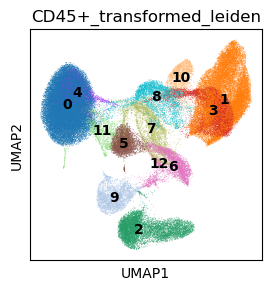

In [22]:
fp.pl.umap(dataset,
           color = "CD45+_transformed_leiden",
           legend_loc = "on data")

The clusters likely correspond to the different lineages. We next plot the same UMAP, but color by organ. We notice, that certain clusters are clearly dominated by specific organs.

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


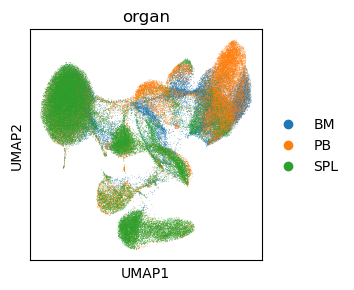

In [13]:
fp.pl.umap(dataset,
           color = "organ")

## Cluster abundances

In order to quantify this, we use the `fp.pl.cluster_abundance()` plot.

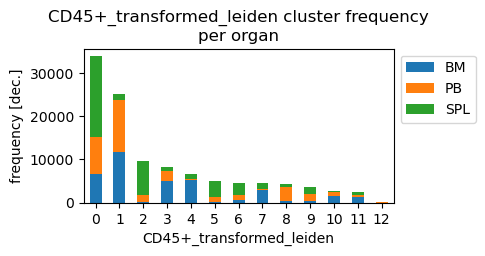

In [24]:
fp.pl.cluster_abundance(dataset,
                        cluster_key = "CD45+_transformed_leiden",
                        groupby = "organ",
                        normalize = False,
                        figsize = (4,2))

## Cluster frequency

We can plot the cluster frequency using the `fp.pl.cluster_frequency()` function.

In [42]:
dataset.obs.groupby(["CD45+_transformed_leiden", "sample_ID", "organ"]).value_counts(["organ"])

ValueError: Keys {'organ'} in subset cannot be in the groupby column keys.

In [35]:
df = dataset.obs.groupby("CD45+_transformed_leiden", observed = False).value_counts(["sample_ID", "organ"]).reset_index()

In [36]:
df = df.loc[df["CD45+_transformed_leiden"] == "0"]

In [37]:
df

,CD45+_transformed_leiden,sample_ID,organ,count
0,0,19,SPL,1233
1,0,22,SPL,1183
2,0,23,SPL,1171
3,0,18,SPL,1120
4,0,45,SPL,1089
...,...,...,...,...
154,0,62,SPL,0
155,0,63,BM,0
156,0,63,SPL,0
157,0,66,BM,0


In [30]:
fp.pl.cluster_frequency(dataset,
                        cluster_key = "CD45+_transformed_leiden",
                        cluster = "0",
                        groupby = "organ", return_dataframe = True)

,CD45+_transformed_leiden,sample_ID,organ,count
0,0,19,SPL,1233
1,0,22,SPL,1183
2,0,23,SPL,1171
3,0,18,SPL,1120
4,0,45,SPL,1089
...,...,...,...,...
154,0,62,SPL,0
155,0,63,BM,0
156,0,63,SPL,0
157,0,66,BM,0


## Cluster expression heatmap

Notably, from the UMAP projection we would have assumed that cluster 0 is almost exclusively spleen-derived, while it is only 50%. We next try to find out what cluster 0 is expressing. For this, we use the `fp.pl.cluster_heatmap()` functionality.  

In order to plot marker expressions per cluster, we first have to calculate them. We use the `fp.tl.mfi()` function and pass the clusters as a `groupby` parameter. We use the `aggregate` parameter to control if the grouping is additionally performed by `sample_ID`. Here, we passt `aggregate=True` in order to calculate the MFI per cluster only.

In [15]:
fp.tl.mfi(dataset,
          groupby = "CD45+_transformed_leiden",
          aggregate = True)

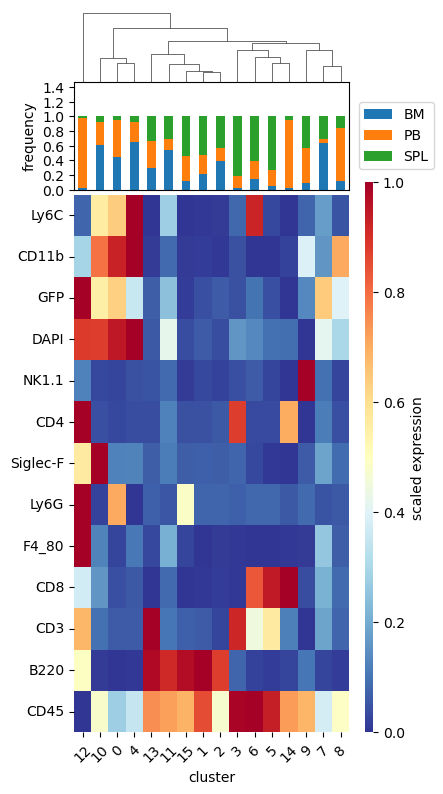

In [16]:
fp.pl.cluster_heatmap(dataset,
                      annotate = "frequency",
                      annotation_kwargs = {"groupby": "organ", "normalize": True},
                      cluster_key = "CD45+_transformed_leiden",
                      figsize = (4,8))

We notice that cluster 0 is expressing B220 highly, which makes it likely to be B-cells. We check with our manual gating by converting the gate information to an `.obs` column and coloring the UMAP.

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


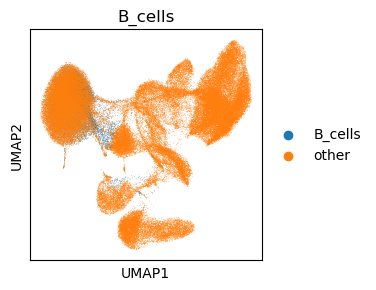

In [17]:
fp.convert_gate_to_obs(dataset, "B_cells")
fp.pl.umap(dataset, color = "B_cells")

## Marker expression per cluster

N

In [ ]:
### comparing the two "neutrophil clusters 0 and 3"
fp.tl.mfi(neus,
          layer = "compensated",
          groupby = "CD45+_transformed_leiden",
          aggregate = False # False means that we use groupby and sample_ID for grouping. This allows for statistical testing
         )
fp.pl.fold_change(neus,
                  layer = "compensated",
                  data_group = "CD45+_transformed_leiden",
                  groupby = "CD45+_transformed_leiden",
                  group1 = "0",
                  group2 = "3",
                  figsize = (4,5),
                  stat = "p_adj"
                  )

In [21]:
test = dataset.copy()
import scanpy as sc
sc.pp.subsample(test, fraction = 1)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


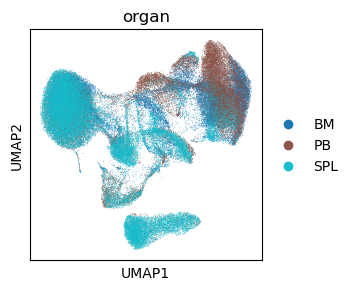

In [41]:
fp.pl.umap(dataset,
           color = "organ", palette = "tab10")

In [3]:
dataset = fp.read_dataset(input_dir = "../../Tutorials/mouse_lineages/",
                          file_name = "raw_dataset_samplewise")

In [4]:
dataset

AnnData object with n_obs × n_vars = 200000 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining', 'CD45+_transformed_leiden', 'T_cells', 'CD4_T_cells', 'CD8_T_cells', 'Neutrophils', 'Monocytes', 'B_cells', 'NK_cells', 'Eosinophils', 'not_identified'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'gate_frequencies', 'settings', 'pca_CD45+_transformed', 'CD45+_transformed_neighbors', 'CD45+_transformed_leiden', 'umap_CD45+_transformed', 'organ_colors', 'genotype_colors', 'CD45+_transformed_leiden_colors', 'T_cells_colors', 'CD4_T_cells_colors', 'CD8_T_cells_colors', 'Neutrophils_colors', 'Monocytes_colors', 'B_cells_colors', 'Eosinophils_colors', 'NK_cells_colors', 'mfi_CD45+_transformed_leiden_compensated', 'not_identified_colors', 'mfi_sample_ID_compensated', 'mfi_sample_ID_transformed', 'fop_sam

In [5]:
fp.settings.default_gate = "CD45+"
fp.settings.default_layer = "transformed"

In [6]:
bm_subset = dataset[dataset.obs["organ"] == "BM",:].copy()

In [7]:
fp.tl.pca(bm_subset,
          scaling = None)
fp.tl.neighbors(bm_subset,
                scaling = None)
fp.tl.leiden(bm_subset,
             scaling = None)
fp.tl.umap(bm_subset,
           scaling = None)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\pynndescent\pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\numba\core\types\functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\pynndescent\pynndescent_.py:348: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/

In [8]:
# we calculate the mfi per leiden cluster
fp.tl.mfi(bm_subset,
          layer = "compensated",
          groupby = "CD45+_transformed_leiden",
          aggregate = True # True means that we do not divide by sample_ID in addition
         )
fp.tl.mfi(bm_subset,
          layer = "transformed",
          groupby = "CD45+_transformed_leiden",
          aggregate = True)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


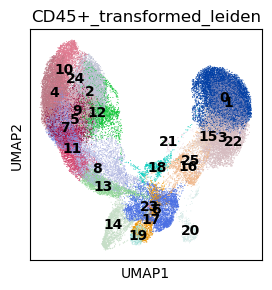

In [9]:
# we plot the umap and color by leiden clusters
fp.pl.umap(bm_subset,
           color = "CD45+_transformed_leiden",
           legend_loc = "on data")

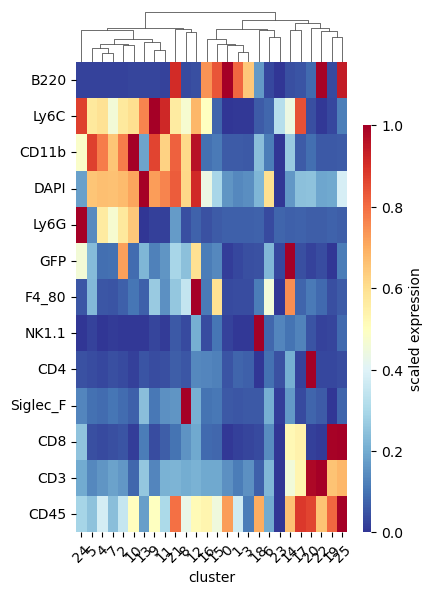

In [10]:
# we display the transformed marker expression per cluster
fp.pl.cluster_heatmap(bm_subset,
                      layer = "transformed",
                      cluster_key = "CD45+_transformed_leiden",
                      cmap = "RdYlBu_r",
                      figsize = (4,6),
                      y_label_fontsize = 10)

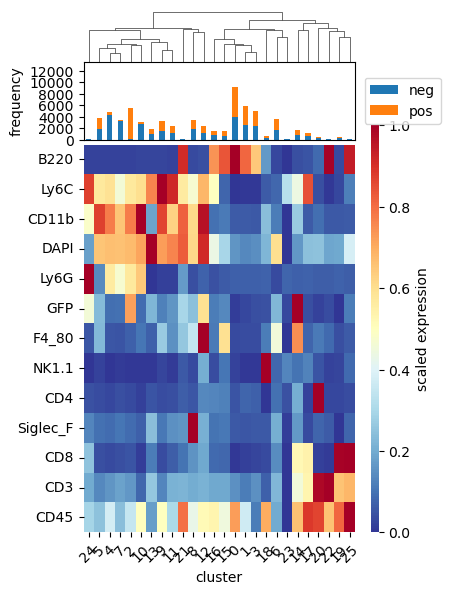

In [11]:
# we can annotate the frequency of the clusters, grouped by the respective genotype
fp.pl.cluster_heatmap(bm_subset,
                      layer = "transformed",
                      cluster_key = "CD45+_transformed_leiden",
                      annotate = "frequency",
                      annotation_kwargs = {"groupby": "genotype", "normalize": False},
                      cmap = "RdYlBu_r",
                      figsize = (4,6),
                      y_label_fontsize = 10)

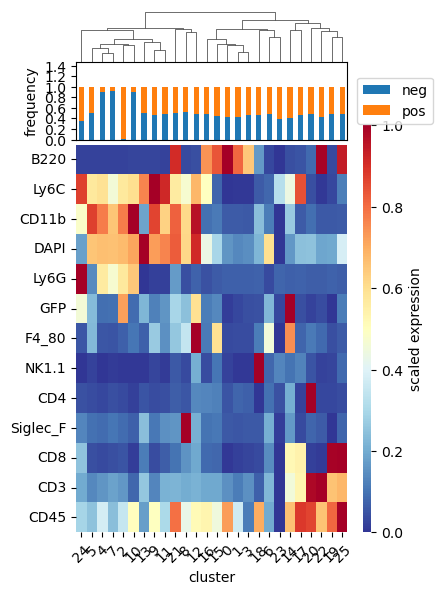

In [12]:
# we plot the same heatmap but normalize the frequencies to one to observe differences between genotypes
fp.pl.cluster_heatmap(bm_subset,
                      layer = "transformed",
                      cluster_key = "CD45+_transformed_leiden",
                      annotate = "frequency",
                      annotation_kwargs = {"groupby": "genotype", "normalize": True},
                      cmap = "RdYlBu_r",
                      figsize = (4,6),
                      y_label_fontsize = 10)

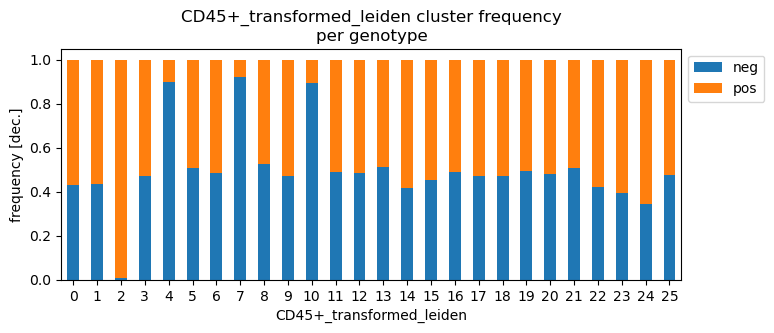

In [13]:
# the top plot is available via pl.cluster_abundance
fp.pl.cluster_abundance(bm_subset,
                        cluster_key = "CD45+_transformed_leiden",
                        groupby = "genotype",
                        normalize = True,
                        figsize = (8,3))

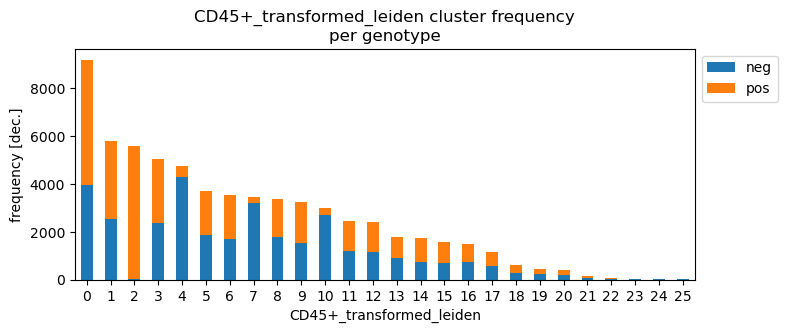

In [14]:
# the top plot is available via pl.cluster_abundance
fp.pl.cluster_abundance(bm_subset,
                        cluster_key = "CD45+_transformed_leiden",
                        groupby = "genotype",
                        normalize = False, # gives the actual numbers
                        figsize = (8,3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


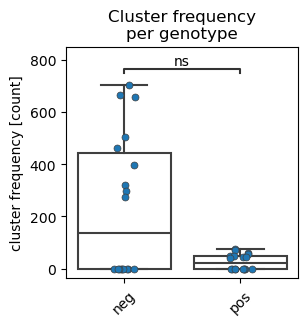

In [15]:
# the frequency for single clusters can be visualized using pl.cluster_frequency
fp.pl.cluster_frequency(bm_subset,
                        cluster_key = "CD45+_transformed_leiden",
                        cluster = "4",
                        groupby = "genotype")

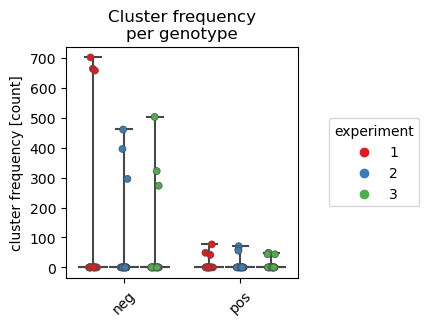

In [16]:
# the frequency for single clusters can be visualized using pl.cluster_frequency
fp.pl.cluster_frequency(bm_subset,
                        cluster_key = "CD45+_transformed_leiden",
                        cluster = "4",
                        groupby = "genotype",
                        splitby = "experiment",
                        stat_test = False)

In [17]:
# return the dataframe to continue analysis elsewhere
fp.pl.cluster_frequency(bm_subset,
                        cluster_key = "CD45+_transformed_leiden",
                        cluster = "4",
                        groupby = "genotype",
                        normalize = True,
                        return_dataframe = True)

,CD45+_transformed_leiden,sample_ID,genotype,count
144,4,7,neg,0.147232
145,4,4,neg,0.139262
146,4,8,neg,0.138003
147,4,55,neg,0.105495
148,4,29,neg,0.096686
149,4,31,neg,0.083054
150,4,54,neg,0.067534
151,4,26,neg,0.062081
152,4,53,neg,0.057257
153,4,6,pos,0.016149


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


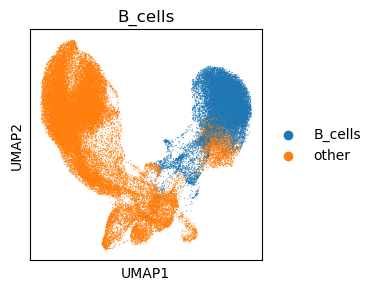

In [18]:
### the umap looks way overclustered, and we confirm this by labeling B-cells and neutrophils
fp.pl.umap(bm_subset,
           color = "B_cells")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


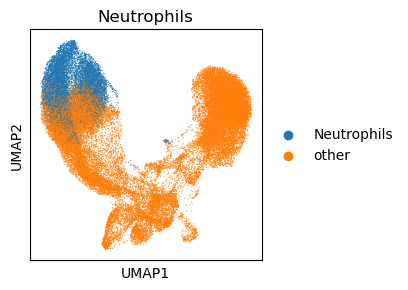

In [19]:
fp.pl.umap(bm_subset,
           color = "Neutrophils")

In [20]:
### we repeat the leiden clustering but with lower resolution
fp.tl.leiden(bm_subset,
             scaling = None,
             resolution = 0.2)
fp.tl.mfi(bm_subset,
          layer = "compensated",
          groupby = "CD45+_transformed_leiden",
          aggregate = True)
fp.tl.mfi(bm_subset,
          layer = "transformed",
          groupby = "CD45+_transformed_leiden",
          aggregate = True)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


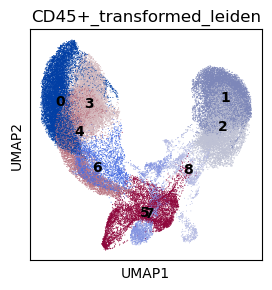

In [21]:
fp.pl.umap(bm_subset,
           color = "CD45+_transformed_leiden",
           legend_loc = "on data")

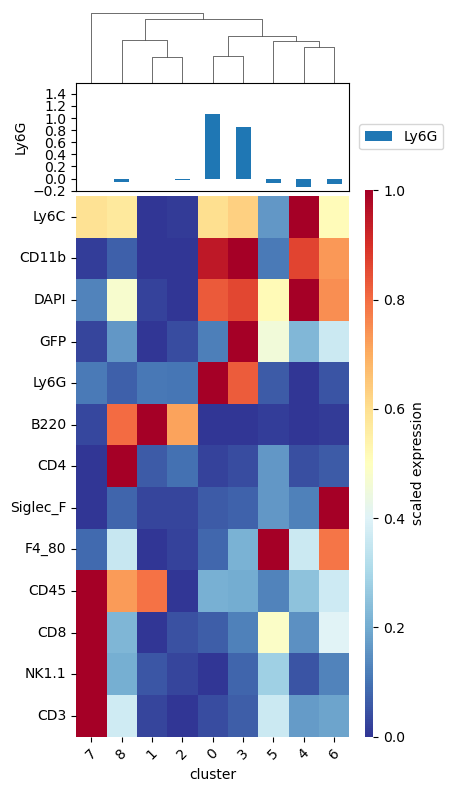

In [22]:
# here we plot the transformed mfi on top of the plot
fp.pl.cluster_heatmap(bm_subset,
                      layer = "transformed",
                      cluster_key = "CD45+_transformed_leiden",
                      cmap = "RdYlBu_r",
                      figsize = (4,8),
                      annotate = "Ly6G",
                      y_label_fontsize = 10)

In [23]:
neus = bm_subset[bm_subset.obs["Neutrophils"] == "Neutrophils",:].copy()

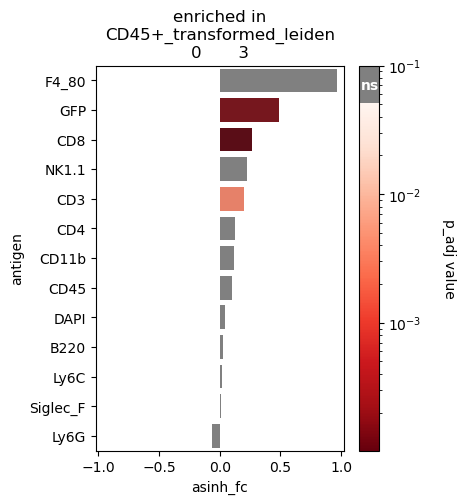

In [24]:
### comparing the two "neutrophil clusters 0 and 3"
fp.tl.mfi(neus,
          layer = "compensated",
          groupby = "CD45+_transformed_leiden",
          aggregate = False # False means that we use groupby and sample_ID for grouping. This allows for statistical testing
         )
fp.pl.fold_change(neus,
                  layer = "compensated",
                  data_group = "CD45+_transformed_leiden",
                  groupby = "CD45+_transformed_leiden",
                  group1 = "0",
                  group2 = "3",
                  figsize = (4,5),
                  stat = "p_adj"
                  )

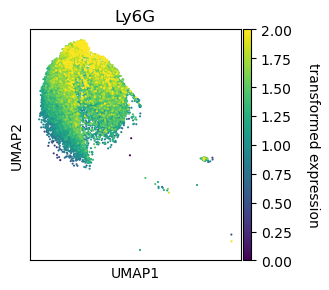

In [25]:
fp.pl.umap(neus,
           color = "Ly6G",
           vmin = 0,
           vmax = 2)

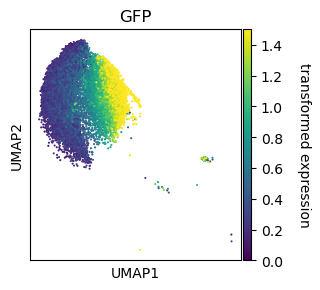

In [26]:
fp.pl.umap(neus,
           color = "GFP",
           vmin = 0,
           vmax = 1.5)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


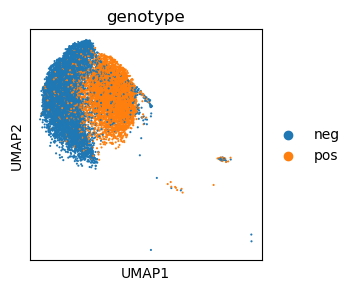

In [27]:
fp.pl.umap(neus,
           color = "genotype",
           vmin = 0,
           vmax = 1.5)

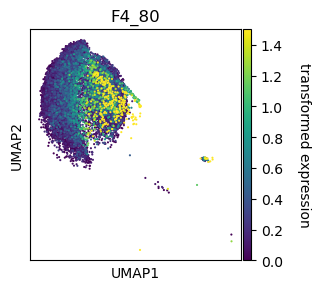

In [28]:
fp.pl.umap(neus,
           color = "F4_80",
           vmin = 0,
           vmax = 1.5)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


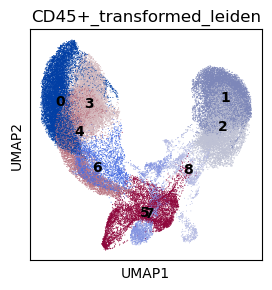

In [29]:
fp.pl.umap(bm_subset,
           color = "CD45+_transformed_leiden",
           legend_loc = "on data")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


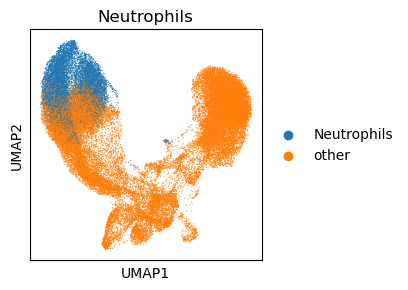

In [30]:
### we now have a look at Neutrophils

fp.pl.umap(bm_subset,
           color = "Neutrophils")

In [31]:
### we exclude GFP for the clustering, as this is the marker for the knockout animals

neus = bm_subset[bm_subset.obs["Neutrophils"] == "Neutrophils",:].copy()
fp.tl.pca(neus,
          gate = "CD45+",
          exclude = ["GFP"],
          scaling = None)
fp.tl.neighbors(neus,
                gate = "CD45+",
                exclude = ["GFP"],
                scaling = None)
fp.tl.leiden(neus,
             gate = "CD45+",
             exclude = ["GFP"],
             scaling = None)
fp.tl.umap(neus,
           gate = "CD45+",
           exclude = ["GFP"],
           scaling = None)

In [32]:
fp.tl.diffmap(neus,
              gate = "CD45+",
              exclude = ["GFP"],
              scaling = None)

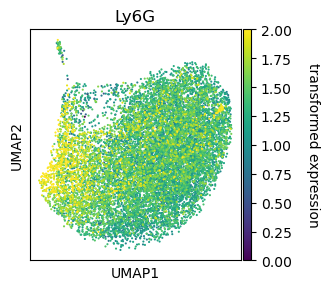

In [33]:
### we see that some cells are still B220 negative, which might be contaminating cells
fp.pl.umap(neus,
           color = "Ly6G",
           vmin = 0,
           vmax = 2)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\plotting\_biax.py:246: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(**plot_params,


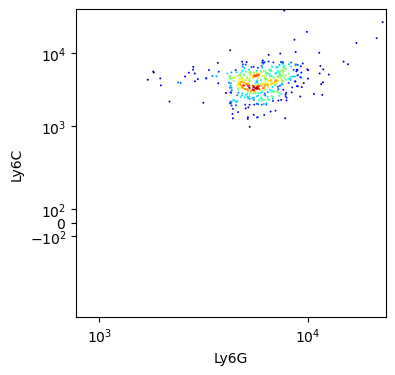

In [34]:
fp.pl.biax(neus,
           sample_identifier = "3",
           gate = "CD45+",
           layer = "compensated",
           x_channel = "Ly6G",
           y_channel = "Ly6C")

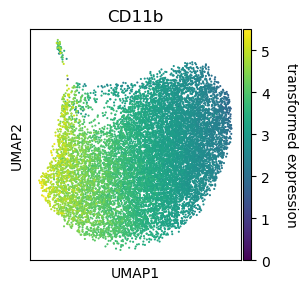

In [35]:
fp.pl.umap(neus,
           color = "CD11b",
           vmin = 0,
           vmax = 5.5)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


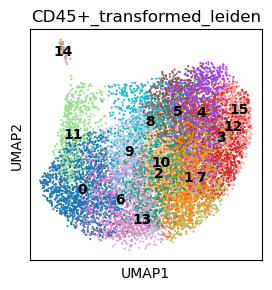

In [36]:
fp.pl.umap(neus,
           color = "CD45+_transformed_leiden",
           legend_loc = "on data")

In [37]:
neus.obsm["X_diffmap_CD45+_transformed"] = neus.obsm["X_diffmap_CD45+_transformed"][:,1:]

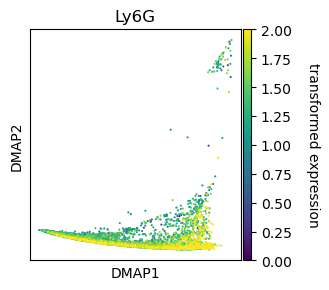

In [38]:
###we see a differentiation gradient characterized by Ly6G...

fp.pl.diffmap(neus,
              color = "Ly6G",
              vmin = 0,
              vmax = 2)

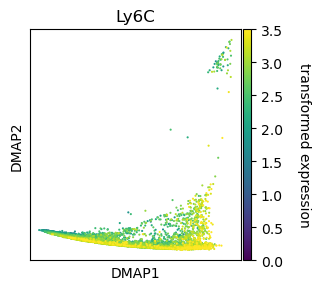

In [39]:
###we see a differentiation gradient characterized by Ly6G...

fp.pl.diffmap(neus,
              color = "Ly6C",
              vmin = 0,
              vmax = 3.5)

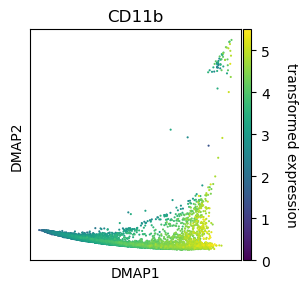

In [40]:
### ... and CD11b
fp.pl.diffmap(neus,
              color = "CD11b",
              vmin = 0,
              vmax = 5.5)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


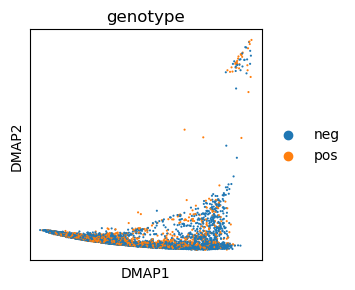

In [41]:
###we see a differentiation gradient characterized by Ly6G

fp.pl.diffmap(neus,
              color = "genotype",
              vmin = 0,
              vmax = 2)

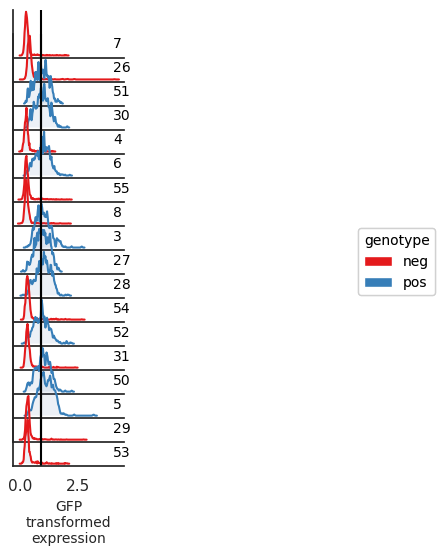

In [42]:
### using the marker density functionality, we can plot the marker expression distribution
### this can sometimes help to identify outliers that are visible in the PCA.

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fp.pl.marker_density(neus,
                     markers = "GFP",
                     groupby = "sample_ID",
                     colorby = "genotype",
                     ridge = True)

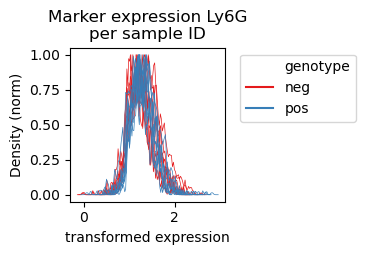

In [43]:
### using the marker density functionality, we can plot the marker expression distribution
### this can sometimes help to identify outliers that are visible in the PCA.

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fp.pl.marker_density(neus,
                     markers = "Ly6G",
                     groupby = "sample_ID",
                     colorby = "genotype",
                     ridge = False)

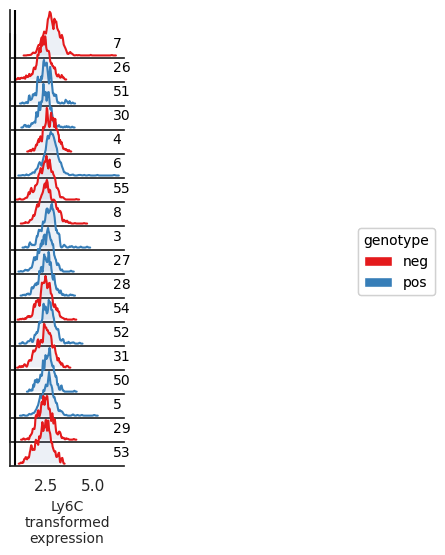

In [44]:
### using the marker density functionality, we can plot the marker expression distribution
### this can sometimes help to identify outliers that are visible in the PCA.

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

fp.pl.marker_density(neus,
                     markers = "Ly6C",
                     groupby = "sample_ID",
                     colorby = "genotype",
                     ridge = True)